**Run the following two cells before you begin.**

In [1]:
%autosave 10

Autosaving every 10 seconds


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve

%matplotlib inline

**First, import the cleaned data set. Then, select the features from the DataFrame of the case study data.**
    
These features should be: `'LIMIT_BAL'`, `'EDUCATION'`, `'MARRIAGE'`, `'AGE'`, `'PAY_1'`, `'BILL_AMT1'`, `'BILL_AMT2'`, `'BILL_AMT3'`, `'BILL_AMT4'`, `'BILL_AMT5'`, `'BILL_AMT6'`, `'PAY_AMT1'`, `'PAY_AMT2'`, `'PAY_AMT3'`, `'PAY_AMT4'`, `'PAY_AMT5'`, AND `'PAY_AMT6'`.

In [3]:
# Import data set
data = pd.read_csv ("/Cross-Validation_and_Feature_Engineering/data set/cleaned_data.csv")

In [4]:
# Create features list
feat_list = ['LIMIT_BAL', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5','PAY_AMT6']

_____________________________________________________
**Next, make a 80:20 train/test split using a random seed of 24.**

In [5]:
X_train,X_test,y_train,y_test = train_test_split(data[feat_list],data['default payment next month'],test_size=0.2,random_state=24)


_____________________________________________________
**Then, instantiate the `MinMaxScaler` to scale the data.**

In [6]:
scaler = MinMaxScaler()


_____________________________________________________
**Next, instantiate a logistic regression model with the `saga` solver, L1 penalty, and set `max_iter` to 1,000 as we want the solver to have enough iterations to find a good solution.**

In [7]:
lr = LogisticRegression(solver='saga',penalty='l1',max_iter=1000)


_____________________________________________________
**Next, import the `Pipeline` class and create a `Pipeline` with the scaler and the logistic regression model, using the names `'scaler'` and `'model'` for the steps, respectively.**

In [8]:
from sklearn.pipeline import Pipeline
pipe = Pipeline(steps = 
      [
       ('scaler',scaler),
       ('model',lr)
      ]
)

_____________________________________________________
**Now, use the `get_params` method to view the parameters from each stage of the pipeline.**

In [9]:
# Use `get_params`
params = pipe.get_params()
params

{'memory': None,
 'steps': [('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
  ('model',
   LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                      intercept_scaling=1, l1_ratio=None, max_iter=1000,
                      multi_class='warn', n_jobs=None, penalty='l1',
                      random_state=None, solver='saga', tol=0.0001, verbose=0,
                      warm_start=False))],
 'verbose': False,
 'scaler': MinMaxScaler(copy=True, feature_range=(0, 1)),
 'model': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=1000,
                    multi_class='warn', n_jobs=None, penalty='l1',
                    random_state=None, solver='saga', tol=0.0001, verbose=0,
                    warm_start=False),
 'scaler__copy': True,
 'scaler__feature_range': (0, 1),
 'model__C': 1.0,
 'model__class_weight': None,
 'model__dual': False,
 'model__fi

**Use the `set_params` method to change the the `model__C` parameter to 2.**

In [10]:
# View what `model__C` is set to currently
params['model__C']

1.0

In [11]:
# Change `model__C` to 2
C_vals = [10**2,10,1,10**-1,10**-2,10**-3]

_____________________________________________________
**Then, create a smaller range of C values to test with cross-validation, as these models will take longer to train and test with more data than our previous activities.**

**Use C_vals = [$10^2$, $10$, $1$, $10^{-1}$, $10^{-2}$, $10^{-3}$].**


<details>
    <summary>Hint:</summary>
    Recall that exponents in Python use the ** operator.
</details>

In [12]:
from sklearn.model_selection import StratifiedKFold as skf
k_folds = skf(n_splits=4,shuffle=True,  random_state=1)

Now, define `k_folds` using `StratifiedKFold`. The number of folds should be 4. Set the random state to 1.

In [13]:
from sklearn.model_selection import StratifiedKFold as skf
k_folds = skf(n_splits=4,shuffle=True,  random_state=1)


_____________________________________________________
**Next, make a new version of the `cross_val_C_search` function, called `cross_val_C_search_pipe`. Instead of the model argument, this function will take a pipeline argument. The changes inside the function will be to set the `C` value using `set_params(model__C = <value you want to test>)` on the pipeline, replacing the model with the pipeline for the fit and `predict_proba` methods, and accessing the `C` value using `pipeline.get_params()['model__C']` for the printed status update.**

In [14]:
def cross_val_C_search_pipe(data,pipe,x):
  pipe.set_params(model__C=x)
  model = pipe.fit(X_train,y_train)
  print('C:',pipe.get_params()['model__C'],end='----------')
  pre_prob = model.predict_proba(data)
  return pre_prob

_____________________________________________________
**Now, run this function as in the previous activity, but using the new range of `C` values, the pipeline you created, and the features and response variable from the training split of the case study data.**

    You may see warnings here, or in later steps, about the non-convergence of the solver; you could experiment with the `tol` or `max_iter`` options to try and achieve convergence, although the results you obtain with `max_iter = 1000` are likely to be sufficient.

In [15]:
for i in C_vals:
  cross_val_C_search_pipe(X_test,pipe,i)

C: 100----------C: 10----------C: 1----------C: 0.1----------C: 0.01----------C: 0.001----------

_____________________________________________________
**Plot the average training and testing ROC AUC across folds, for each `np.log(C_vals)` value.**

In [16]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
#For testing
print("------------------FOR TESTING------------------------")
test_scores = []
for i in C_vals:
  prob = cross_val_C_search_pipe(X_test,pipe,i)
  score = roc_auc_score(y_test,prob[:,1])
  test_scores.append(score)
  print("C: np.log({}), roc_auc_score: {}".format(i,score))

------------------FOR TESTING------------------------
C: 100----------C: np.log(100), roc_auc_score: 0.709312643635286
C: 10----------C: np.log(10), roc_auc_score: 0.7089462635656987
C: 1----------C: np.log(1), roc_auc_score: 0.7058067510915764
C: 0.1----------C: np.log(0.1), roc_auc_score: 0.7004486498024076
C: 0.01----------C: np.log(0.01), roc_auc_score: 0.7004838786552524
C: 0.001----------C: np.log(0.001), roc_auc_score: 0.5


In [17]:
print("------------------FOR TRAINING------------------------")
train_scores = []
for i in C_vals:
  prob = cross_val_C_search_pipe(X_train,pipe,i)
  score = roc_auc_score(y_train,prob[:,1])
  train_scores.append(score)
  print("C: np.log({}), roc_auc_score: {}".format(i,score))

------------------FOR TRAINING------------------------
C: 100----------C: np.log(100), roc_auc_score: 0.7197224593750922
C: 10----------C: np.log(10), roc_auc_score: 0.7195755649179163
C: 1----------C: np.log(1), roc_auc_score: 0.7181527744958459
C: 0.1----------C: np.log(0.1), roc_auc_score: 0.7151769413158102
C: 0.01----------C: np.log(0.01), roc_auc_score: 0.7164457493220031
C: 0.001----------C: np.log(0.001), roc_auc_score: 0.5


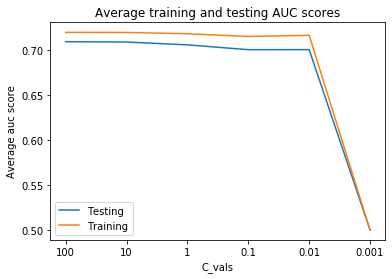

In [18]:
import matplotlib.pyplot as plt
x = [1,2,3,4,5,6]
plt.xticks(x,C_vals)
plt.plot(x,test_scores,label = "Testing")
plt.plot(x,train_scores,label="Training")
plt.title("Average training and testing AUC scores")
plt.legend()
plt.xlabel("C_vals")

plt.ylabel('Average auc score')
plt.show()

_____________________________________________________
**Up next, create interaction features for the case study data using scikit-learn's `PolynomialFeatures`. You should use 2 as the degree of polynomial features. Confirm that the number of new features makes sense.**

In [19]:
from sklearn.preprocessing import PolynomialFeatures
make_interactions = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
make_interactions

PolynomialFeatures(degree=2, include_bias=False, interaction_only=True,
                   order='C')

_____________________________________________________
**Finally, repeat the cross-validation procedure and observe the model performance now.**

In [20]:
# Using the new features, make a 80:20 train/test split using a random seed of 24.**
x_data = make_interactions.fit_transform(data[feat_list])


In [21]:
X_train,X_test,y_train,y_test = train_test_split(x_data,data['default payment next month'],test_size=0.2,random_state=24)


In [22]:
# Call the cross_val_C_search_pipe() function using the new training data.
# All other parameters should remain the same.
# Note that this training may take a few minutes due to the larger number of features.
from sklearn import metrics
from sklearn.metrics import roc_auc_score
#For testing
print("------------------FOR TESTING------------------------")
test_scores = []
for i in C_vals:
  prob = cross_val_C_search_pipe(X_test,pipe,i)
  score = roc_auc_score(y_test,prob[:,1])
  test_scores.append(score)
  print("C: np.log({}), roc_auc_score: {}".format(i,score))

print("------------------FOR TRAINING------------------------")
train_scores = []
for i in C_vals:
  prob = cross_val_C_search_pipe(X_train,pipe,i)
  score = roc_auc_score(y_train,prob[:,1])
  train_scores.append(score)
  print("C: np.log({}), roc_auc_score: {}".format(i,score))

------------------FOR TESTING------------------------


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


C: 100----------C: np.log(100), roc_auc_score: 0.7297750119674484


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


C: 10----------C: np.log(10), roc_auc_score: 0.7301453293794127


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


C: 1----------C: np.log(1), roc_auc_score: 0.7248359267985883
C: 0.1----------C: np.log(0.1), roc_auc_score: 0.7027484722075436
C: 0.01----------C: np.log(0.01), roc_auc_score: 0.7004838786552524
C: 0.001----------C: np.log(0.001), roc_auc_score: 0.5
------------------FOR TRAINING------------------------


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


C: 100----------C: np.log(100), roc_auc_score: 0.747716637561657


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


C: 10----------C: np.log(10), roc_auc_score: 0.7461360734899846


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


C: 1----------C: np.log(1), roc_auc_score: 0.7377596912682993
C: 0.1----------C: np.log(0.1), roc_auc_score: 0.7171654877831741
C: 0.01----------C: np.log(0.01), roc_auc_score: 0.7164457493220031
C: 0.001----------C: np.log(0.001), roc_auc_score: 0.5


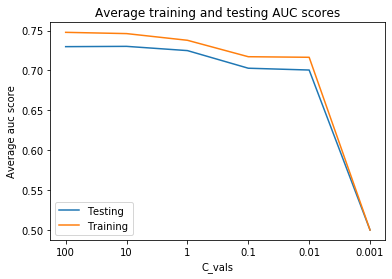

In [23]:
# Plot the average training and testing ROC AUC across folds, for each C value.
# Plot the average training and testing ROC AUC across folds, for each C value.
import matplotlib.pyplot as plt
x = [1,2,3,4,5,6]
plt.xticks(x,C_vals)
plt.plot(x,test_scores,label = "Testing")
plt.plot(x,train_scores,label="Training")
plt.title("Average training and testing AUC scores")
plt.legend()
plt.xlabel("C_vals")

plt.ylabel('Average auc score')
plt.show()

**Take a look at the above graph. Does the average cross-validation testing performance improve with the interaction features? Is regularization useful?**

In [24]:
print("YES THERE IS FURTHER IMPROVEMENT IN THE PERFORMANCE")

YES THERE IS FURTHER IMPROVEMENT IN THE PERFORMANCE
